<center><h1>Mischief Managed</h1></center>

<center>Joe Lucas, Senior AI Security Researcher @ NVIDIA</center>
<center>joetl.com</center>

## Nothing presented here is "new". This presentation is about increasing awareness, not generating FUD.
## The teams involved with Jupyter and IPython have provided plenty of security options and balanced those risks against creating agile R&D environments.
-----

<center><h1>Why Jupyter?</h1></center>

## 1. Code execution platform with plenty of libraries
## 2. Networked
## 3. Often contains keys and secrets
## 4. `Run All`
## 5. Abstraction improves stealth (client/server model)
-----
### How much attention do you pay to your environment?
### Would you notice a new extension running?
### Would you notice history changes?
-----

<center><h1>How are you running Jupyter?</h1></center>

## 1. `--allow-root`
## 2. What directory? ... and how much does this protect you?
## 3. HTTP or HTTPS?
## 4. How much does your token protect you?
## 5. Hidden files?

<center><h1>Modified scikit-learn example</h1></center>

https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter08_ml/01_scikit.ipynb

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import pickle
from utils import RemoteConnection, save_to_s3          # <--- Interact with authenticated remote service
%matplotlib inline

# Get Data

In [2]:
def get_data_from_remote(path='', key='abcdef'):          # <--- We often interact with remote resources (data stores, logging, MLOps infra)
    c = RemoteConnection(path, key)                       #      attackers will try and find those secrets to pivot
    x_tr, y_tr, x, y = c.get_data()
    return x_tr, y_tr, x, y

In [3]:
bucket = "s3://random_bucket"

In [4]:
x_tr, y_tr, x, y = get_data_from_remote(bucket, "AKIAsupersecret") # <--- Plaintext credentials

# If we delete this cell from the notebook before checking into git, does that solve our problem?
# What about environment variables?

Text(0.5, 1.0, 'Generative model')

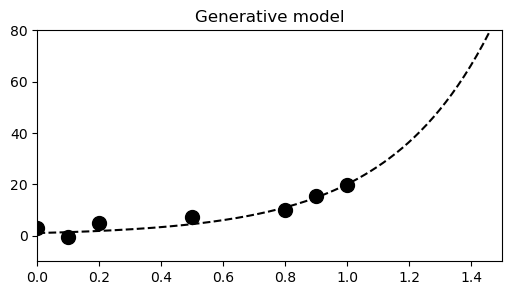

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

# Load Artifacts

In [6]:
with open("lr.pkl", "rb") as f:
    lr = pickle.load(f)
    
# https://blog.trailofbits.com/2021/03/15/never-a-dill-moment-exploiting-machine-learning-pickle-files/
# https://youtu.be/lECEXFtVjig
# But https://scikit-learn.org/stable/model_persistence.html ... joblib?

# Train/Validate/Compare Models

In [7]:
y_lr = lr.predict(x_tr[:, np.newaxis])

Text(0.5, 1.0, 'Linear regression')

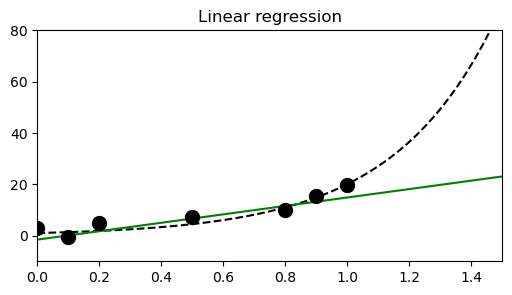

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")

Coefficients, degree 2:
	 17.84 -1.57 0.00
Coefficients, degree 5:
	 -1345.10 3490.35 -3107.14 1089.85 -111.32 0.00


Text(0.5, 1.0, 'Linear regression')

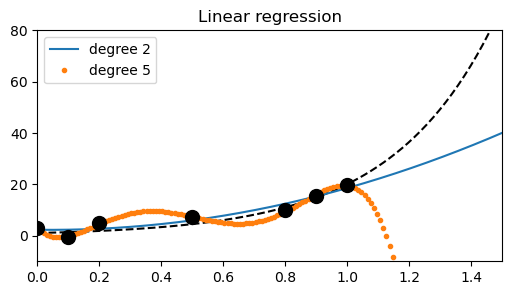

In [9]:
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.2f}' for c in lrp.coef_))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")

# Save Artifacts

In [10]:
with open("lr.pkl", "wb") as f:          # <--- Are we saving anything that helps us verify integrity before loading?
    pickle.dump(lr, f, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
save_to_s3(bucket, "lr.pkl")

True

In [12]:
bucket

's3://evil_bucket'

<center><h1>Examples</h1></center>

## 1. Find servers and get tokens
## 2. Pull secret from sqlite history
## 3. Startup scripts
## 4. Modify runtime without incrementing counter
-----

<center><h1>What should you do?</h1></center>

## Anything an attacker could do in a terminal, they can do through your instance
## Bottom Line: Defense in Depth
## Low privileges, specific directories, and separate users
## Tokens and Passwords
## Know what you're loading and importing (hash/sign/filetypes)
## Use a secrets manager
## Network-level segmentation (localhost, not 0.0.0.0)

<center><h1>Be Safe Out There</h1></center>

## Let me know if you have any cool security tricks
## Questions